##Downloading, extract and connect the dataset from kaggle


**Connect runtime into kaggle and gdrive**
Reference https://medium.com/analytics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! chmod 600 '/content/drive/MyDrive/Colab Notebooks/cnn4/kaggle.json'

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/cnn4"

In [6]:
%cd "/content/drive/MyDrive/Colab Notebooks/cnn4"

/content/drive/MyDrive/Colab Notebooks/cnn4


In [7]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

vegetable-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
%ls

 kaggle.json      vegetable_classification.ipynb  'Vegetable Images'/
 model_saved.h5   vegetable-image-dataset.zip


In [9]:
!unzip '/content/drive/MyDrive/Colab Notebooks/cnn4/vegetable-image-dataset.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/cnn4/vegetable-image-dataset.zip
replace Vegetable Images/test/Bean/0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


##Deep Learning CNN Architecture
##Vegetable Classification
Using Xception and MobileNet Architecture
***Note :*** Untuk melatih model kita tidak memerlukan mesin dan GPU kelas atas yang besar, kita juga dapat bekerja dengan CPU

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [11]:
trainpath =r"/content/drive/MyDrive/Colab Notebooks/cnn4/Vegetable Images/train"
validpath=r"/content/drive/MyDrive/Colab Notebooks/cnn4/Vegetable Images/validation"
testpath =r"/content/drive/MyDrive/Colab Notebooks/cnn4/Vegetable Images/test"

In [12]:
for folder in  os.listdir(trainpath) :
    print(folder)

Cabbage
Cauliflower
Cucumber
Capsium
Pumpkin
Carrot
.ipynb_checkpoints
Broccoli
Potato
Tomato
Radish
Bean
Bitter_Gourd
Bottle_Gourd
Brinjal
Capsicum
Papaya


In [13]:
def num_img_each_folder(path):
    for folder in  os.listdir(path ): 
        files = gb.glob(pathname= str( path +'//' + folder + '/*.jpg'))
        print(f'For training data , found {len(files)} in folder {folder}')

In [14]:
def size_img(path):
    size = []
    for folder in  os.listdir(path ) : 
        files = gb.glob(pathname= str( path +'//' + folder + '/*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)
    return pd.Series(size).value_counts()

In [15]:
code={}
for num , folder in enumerate(os.listdir(trainpath)):
    code.update({folder:num}) 

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

print(code)

{'Cabbage': 0, 'Cauliflower': 1, 'Cucumber': 2, 'Capsium': 3, 'Pumpkin': 4, 'Carrot': 5, '.ipynb_checkpoints': 6, 'Broccoli': 7, 'Potato': 8, 'Tomato': 9, 'Radish': 10, 'Bean': 11, 'Bitter_Gourd': 12, 'Bottle_Gourd': 13, 'Brinjal': 14, 'Capsicum': 15, 'Papaya': 16}


In [16]:
s=100
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [17]:
print(f'we have {len(X_train)} items in X_train')

we have 15030 items in X_train


In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

Output hidden; open in https://colab.research.google.com to view.

In [19]:
X_valid = []
y_valid = []
for folder in  os.listdir(validpath) : 
    files = gb.glob(pathname= str(validpath + '//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_valid.append(list(image_array))
        y_valid.append(code[folder])        

In [20]:
print(f'we have {len(X_valid)} items in X_valid')

we have 3030 items in X_valid


In [21]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_valid),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_valid[i])
    plt.axis('off')
    plt.title(getcode(y_valid[i]))

Output hidden; open in https://colab.research.google.com to view.

In [22]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str(testpath + '//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [23]:
print(f'we have {len(X_test)} items in X_test')

we have 3030 items in X_test


In [24]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

Output hidden; open in https://colab.research.google.com to view.

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid=np.array(X_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_valid shape  is {X_valid.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_valid shape  is {y_valid.shape}')

X_train shape  is (15030, 100, 100, 3)
X_test shape  is (3030, 100, 100, 3)
X_valid shape  is (3030, 100, 100, 3)
y_train shape  is (15030,)
y_test shape  is (3030,)
y_valid shape  is (3030,)


In [26]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.4) ,            
        keras.layers.Dense(15,activation='softmax') ,    
        ])

In [27]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
epochs = 30
ThisModel = KerasModel.fit(X_train, y_train,
                           validation_data=(X_valid,y_valid),
                           epochs=epochs,batch_size=64,verbose=1,
                          callbacks=[early_stop])

Epoch 1/30
235/235 [==============================] - 67s 205ms/step - loss: nan - accuracy: 0.0664 - val_loss: nan - val_accuracy: 0.0660
Epoch 2/30
235/235 [==============================] - 45s 191ms/step - loss: nan - accuracy: 0.0665 - val_loss: nan - val_accuracy: 0.0660


In [29]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

95/95 [==============================] - 3s 28ms/step - loss: nan - accuracy: 0.0660
Test Loss is nan
Test Accuracy is 0.066006600856781


In [30]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

95/95 [==============================] - 3s 25ms/step
Prediction Shape is (3030, 15)


In [31]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))

Output hidden; open in https://colab.research.google.com to view.

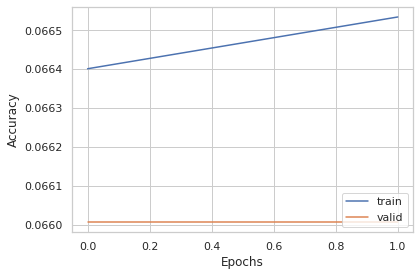

In [32]:
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','valid'],loc='lower right')
plt.tight_layout()

In [33]:
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2(weights='imagenet')
# model.summary()  # Uncomment this to print a long summary!

14536120/14536120 [==============================] - 0s 0us/step


In [34]:
import numpy as np
from imageio import imread

data = np.empty((1, 224, 224, 3))
data[0] = imread('/content/drive/MyDrive/Colab Notebooks/cnn4/Vegetable Images/test/Cabbage/0929.jpg')

<ipython-input-34-5dc769ae4e3c>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data[0] = imread('/content/drive/MyDrive/Colab Notebooks/cnn4/Vegetable Images/test/Cabbage/0929.jpg')


In [35]:
from keras.applications.mobilenet_v2 import preprocess_input

data = preprocess_input(data)

In [36]:
predictions = model.predict(data)
print('Shape: {}'.format(predictions.shape))

1/1 [==============================] - 1s 1s/step
Shape: (1, 1000)


In [37]:
output_neuron = np.argmax(predictions[0])
print('Most active neuron: {} ({:.2f}%)'.format(
    output_neuron,
    100 * predictions[0][output_neuron]
))

Most active neuron: 936 (90.35%)


In [38]:
from keras.applications.mobilenet_v2 import decode_predictions

for name, desc, score in decode_predictions(predictions)[0]:
    print('- {} ({:.2f}%%)'.format(desc, 100 * score))

35363/35363 [==============================] - 0s 0us/step
- head_cabbage (90.35%%)
- custard_apple (0.31%%)
- cauliflower (0.26%%)
- artichoke (0.10%%)
- volleyball (0.08%%)
